# Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# # Hapus semua baris yang memiliki nilai yang hilang
#df = df.dropna()

# Hapus baris dari fitur yang memiliki nilai yang hilang
#df = df.dropna(subset=['Cabin'])

# # Hapus semua baris yang memiliki nilai yang hilang
#df.dropna(inplace=True)

# # Hapus baris dari fitur yang memiliki nilai yang hilang
#df.dropna(subset=['Cabin'], inplace=True)

In [ ]:
## Imputation missing value pada variabel tertentu
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
data_missing_value = df.isnull().sum().reset_index() # menghitung value yang null atau kosong
data_missing_value.columns = ['feature','missing_value'] #Membuat kolom bernama feature dan missing_value
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,2) # Membuat kolom percentage yang berisi data dari rumus round((data_missing_value['missing_value']/len(df))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,Cabin,687,77.10
1,Embarked,2,0.22


In [ ]:
df = df.drop(['Cabin'], axis=1) # Menghapus kolom Cabin karena terlalu banyak value yang kosong yaitu sekitar 77%
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [ ]:
## Imputation missing value pada variabel tertentu
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Data sudah bersih dari value yang kosong**

In [ ]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
adanya perubahan di kolom age, karena ada pengisian value age yang kosong dengan value rata2 age keseluruhan

#Barplot

<Axes: xlabel='Sex', ylabel='Survived'>

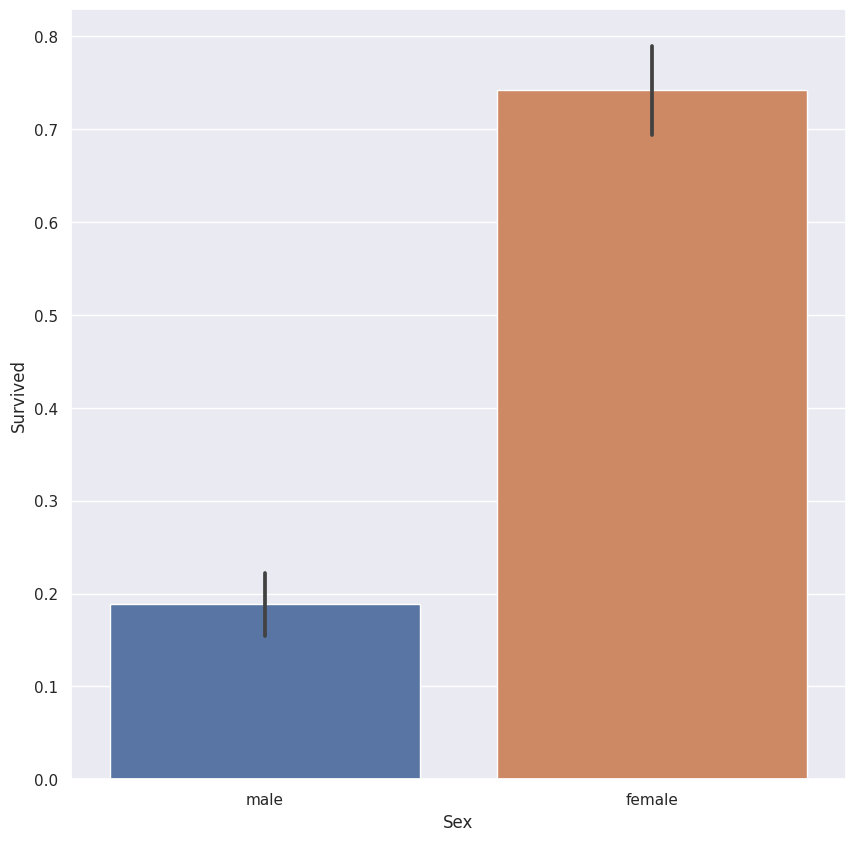

In [ ]:
#barchart (Dataframe, Variable 1, Variable 2)
sns.barplot(data=df,x="Sex",y="Survived")

Lebih banyak perempyuan yang selamat dibanding laki - laki

<Axes: xlabel='Sex', ylabel='count'>

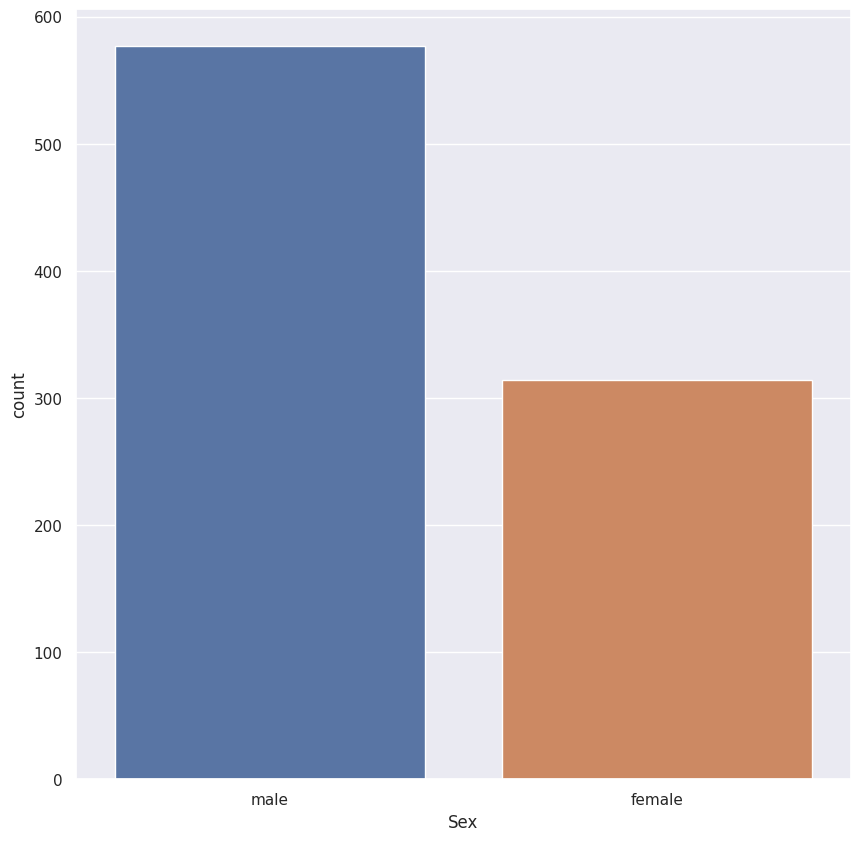

In [ ]:
#countplot
sns.countplot(data=df,x="Sex") # Mengihutung banyaknya laki laki dan perempuan

kesimpulan laki laki lebih banyak daripada wanita

<Axes: xlabel='Survived', ylabel='count'>

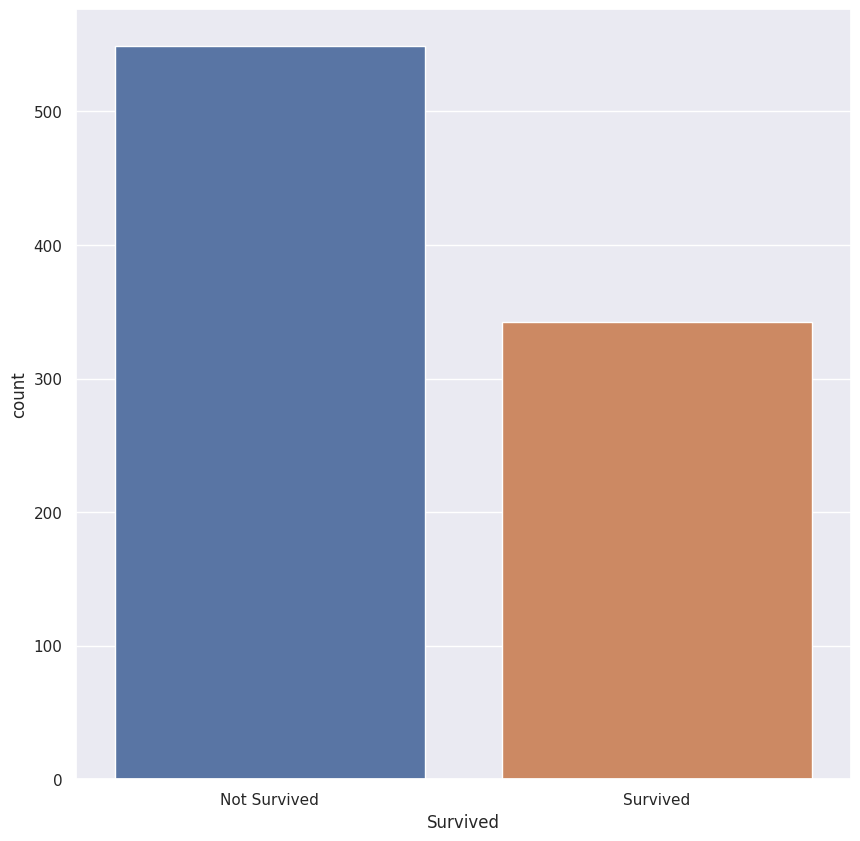

In [ ]:
df['Survived']=df.Survived.map({0:"Not Survived",1:"Survived"}) # Mengubah value 0:"Not Survived",1:"Survived
sns.countplot(data=df,x="Survived") #menghitung banyaknya yang survived dan yang tidak survived

Kesimpulan : lebih banyak yang tidak survived

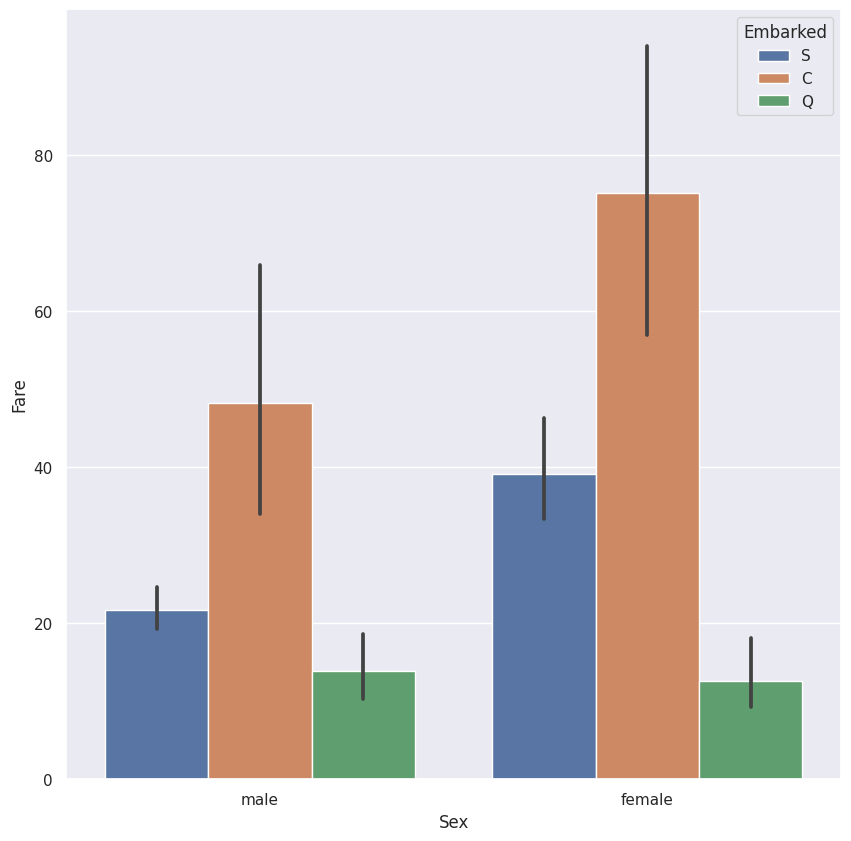

In [ ]:
sns.barplot(data=df,x="Sex",y="Fare",hue="Embarked")
sns.set(rc={'figure.figsize':(8,3)})

<Axes: xlabel='Fare', ylabel='Pclass'>

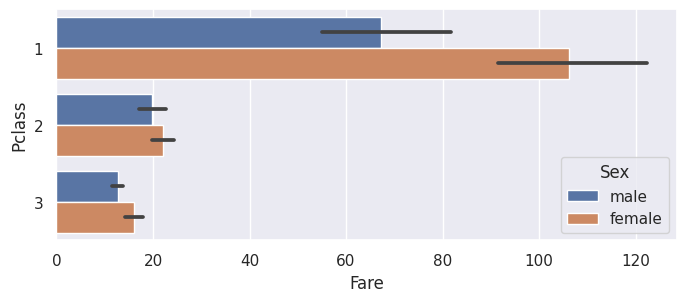

In [ ]:
# change orientation
sns.barplot(data=df,x="Fare",y="Pclass",orient="h",hue="Sex")

<Axes: xlabel='Fare', ylabel='Pclass'>

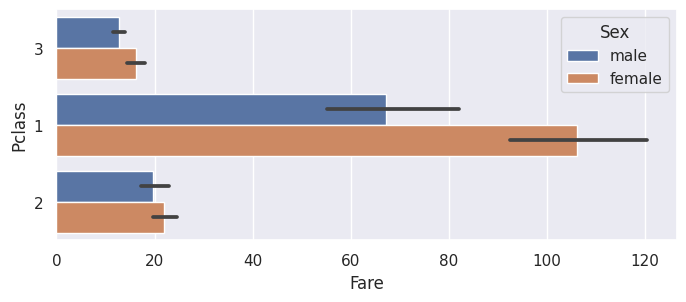

In [ ]:
#change the order of the axis

sns.barplot(data=df,x="Fare",y="Pclass",orient="h",hue="Sex",order=[3,1,2])

# DistPlot

In [ ]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,Not Survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


<Axes: xlabel='Age', ylabel='Count'>

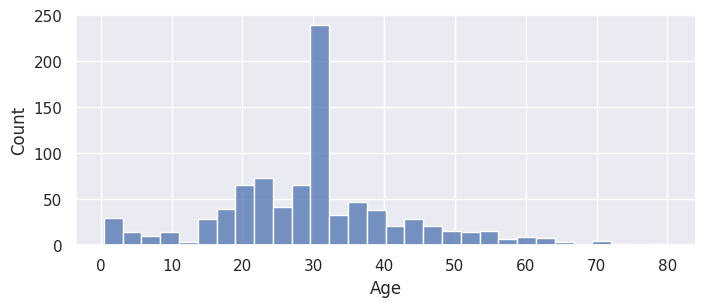

In [ ]:
sns.histplot(data=df,x="Age")

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

[Text(0.5, 1.0, 'Age Distribution Male')]

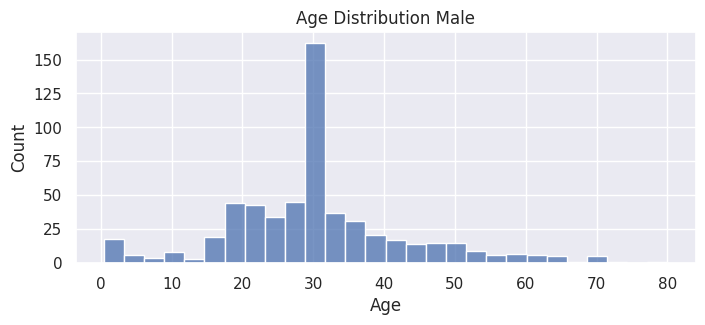

In [ ]:
#Show the distribution in histplot
filtered_df=df[df['Sex']=="male"]

sns.histplot(data=filtered_df,x="Age").set(title='Age Distribution Male')

#Boxplot

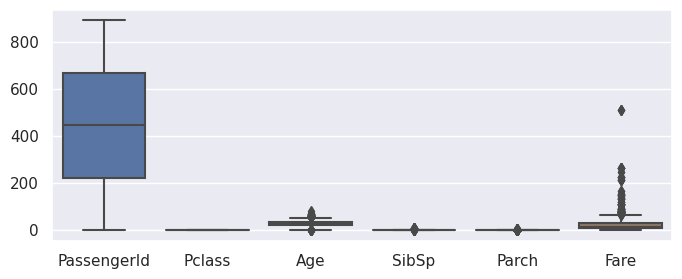

In [ ]:
sns.boxplot(data=df)
sns.set(rc={'figure.figsize':(10,10)})


In [ ]:
#get pc class 3
pclass_3_df=df[df["Pclass"]==3]


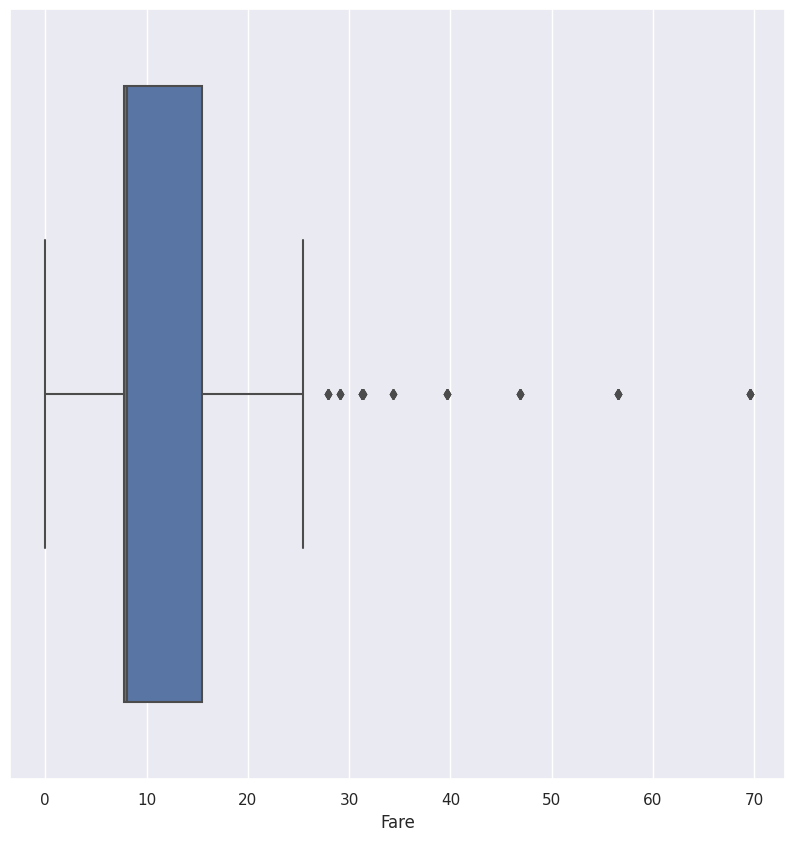

In [ ]:
sns.boxplot(data=pclass_3_df, x="Fare")
sns.set(rc={'figure.figsize':(10,10)})

#Scatterplot

<Axes: xlabel='Age', ylabel='Fare'>

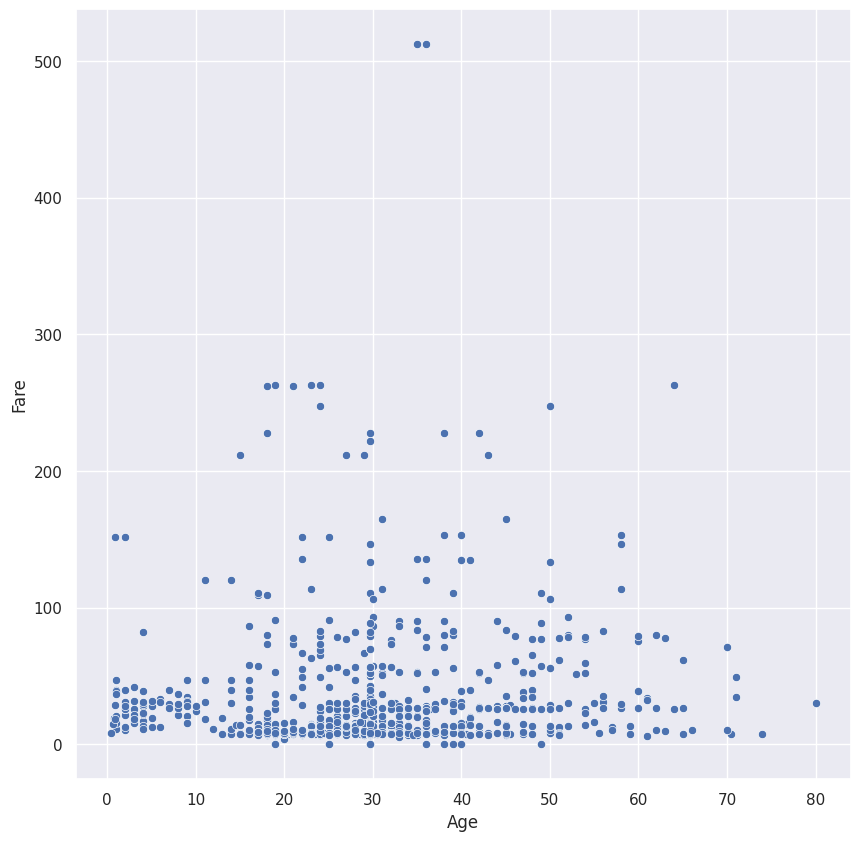

In [ ]:
#find the correlation between age and fare
#two variable should be numeric


sns.scatterplot(data=df,x="Age",y="Fare")

<Axes: xlabel='Pclass', ylabel='Fare'>

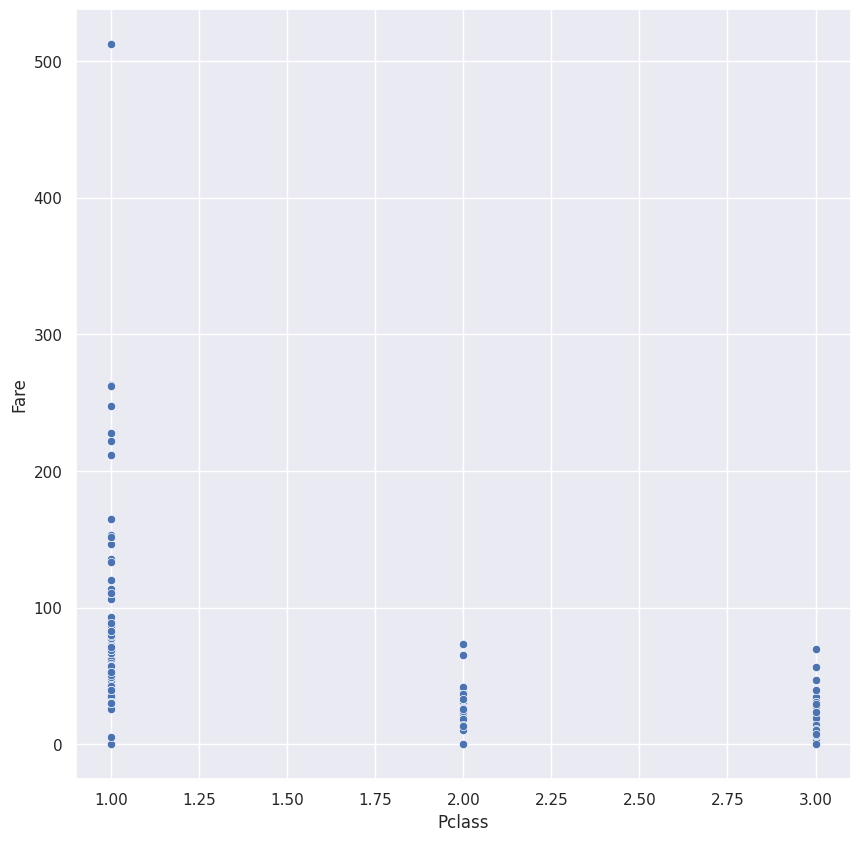

In [ ]:
#relationship
# scatterplot

sns.scatterplot(data=df,x='Pclass',y='Fare')

#Piechart

In [ ]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,Not Survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


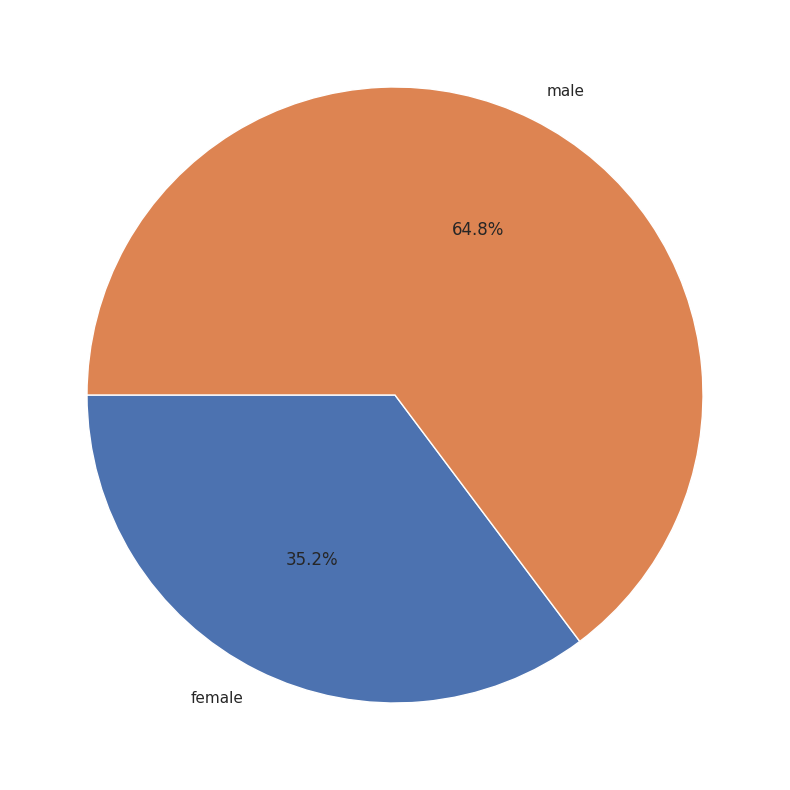

In [ ]:
#composition
#pie chart

grouped_data=df.groupby('Sex').count()['PassengerId'].reset_index()
#grouped_data=grouped_data.rename(columns={"Sex":"Gender","PassengerId": "Total"})

fig1, ax1 = plt.subplots()
ax1.pie(grouped_data['PassengerId'], labels=grouped_data['Sex'], autopct='%1.1f%%', startangle=180)

plt.show()
